In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(10,2)
W1 = np.random.rand(2,4)
b1 = np.random.rand(4)

W2 = np.random.rand(4,3)
b2 = np.random.rand(3)

In [7]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [8]:
a = np.matmul(X,W1) + b1
sigmoid(a)

array([[0.73439805, 0.65750176, 0.65823342, 0.68960211],
       [0.67970069, 0.60173965, 0.65272309, 0.62309711],
       [0.65535595, 0.57416554, 0.64997908, 0.58507263],
       [0.65911276, 0.60701023, 0.65402752, 0.66045439],
       [0.72927558, 0.65445314, 0.65799891, 0.68879019],
       [0.73016033, 0.63871677, 0.65587364, 0.64942578],
       [0.73533783, 0.62013699, 0.6532634 , 0.59535845],
       [0.70957018, 0.61961557, 0.65406681, 0.62922228],
       [0.77203404, 0.67614308, 0.65941556, 0.68459209],
       [0.65551697, 0.58102628, 0.65083724, 0.6018924 ]])

In [ ]:
a1 = np.matmul(X,W1) + b1
s1 = sigmoid(a1)

a2 = np.matmul(s1,W2) + b2
h = sigmoid(a2) # (10,3)

## feed forward

In [15]:
class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self,x):
        return 1 / (1 + np.exp(-x))
        
class Affine :  # 행렬의 내적을 아핀(Affine) 변환이라고 한다
    def __init__(self,W,b):
        self.params = [W,b]
        
    def forward(self,x):
        W,b = self.params
        out = np.dot(x,W) + b
        return out

In [16]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size,output_size):
        I,H,O =  input_size, hidden_size,output_size
        
        W1 = np.random.rand(I,H)
        b1 = np.random.rand(H)

        W2 = np.random.rand(H,O)
        b2 = np.random.rand(O)
        
        self.layers = [
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2),
            Sigmoid(),
        ]
        
        self.params = []
        #  # 모든 가중치를 리스트에 모은다.
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self,x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
t = TwoLayerNet(2,4,3)
t.params

[array([[0.94093887, 0.67807348, 0.60012405, 0.24679263],
        [0.70001928, 0.24367734, 0.51742417, 0.84666649]]),
 array([0.04402444, 0.79086087, 0.54807195, 0.06910951]),
 array([[0.16358678, 0.01941964, 0.42830718],
        [0.92364039, 0.1478812 , 0.88044678],
        [0.10981361, 0.50739027, 0.22497256],
        [0.60022914, 0.7728105 , 0.04815289]]),
 array([0.37940066, 0.58443772, 0.114699  ])]

In [17]:
X= np.random.rand(10,2)
model = TwoLayerNet(2,4,3)

s= model.predict(X)
print(s,s.shape)

[[0.85937387 0.84644905 0.75399417]
 [0.88266492 0.8589321  0.77202912]
 [0.88117103 0.85955559 0.76972501]
 [0.89024274 0.86405475 0.77702459]
 [0.86384938 0.84924518 0.75705603]
 [0.87028177 0.85323608 0.76156485]
 [0.87229913 0.85395712 0.76348263]
 [0.89265717 0.86522424 0.7789244 ]
 [0.88951179 0.86403333 0.77620981]
 [0.88815736 0.86202798 0.77608774]] (10, 3)


In [18]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a = b
print(a)
print(id(a) == id(b))
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a[...] = b
print(a)
print(id(a) == id(b))

[4 5 6]
True
[4 5 6]
False



스파이럴 데이터셋으로 학습

In [22]:
import matplotlib as mpl
import pandas as pd
mpl.rcParams['axes.unicode_minus'] = False

def load_data(seed=1984):
    np.random.seed(seed)
    N = 100  # 클래스당 샘플 수
    DIM = 2  # 데이터 요소 수
    CLS_NUM = 3  # 클래스 수

    x = np.zeros((N*CLS_NUM, DIM))  # (300,2)
    t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=np.int)  #(300,3)

    for j in range(CLS_NUM): # 3회 반복
        for i in range(N): # N*j, N*(j+1)):
            rate = i / N
            radius = 1.0*rate
            theta = j*4.0 + 4.0*rate + np.random.randn()*0.2

            ix = N*j + i
            x[ix] = np.array([radius*np.sin(theta),
                              radius*np.cos(theta)]).flatten()
            t[ix, j] = 1

    return x, t

In [23]:
x, t = load_data()

df = pd.DataFrame(x)
df['label'] = np.argmax(t,1)  # axis=1 (수평방향)
print(df['label'].value_counts())
df

2    100
1    100
0    100
Name: label, dtype: int64


,0,1,label
0,-0.000000,0.000000,0
1,-0.000977,0.009952,0
2,0.005127,0.019332,0
3,-0.000386,0.029998,0
4,0.014251,0.037375,0
...,...,...,...
295,-0.456406,0.833183,2
296,-0.630263,0.724133,2
297,-0.575706,0.780681,2
298,-0.206075,0.958088,2


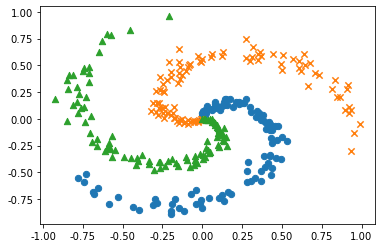

In [24]:
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
# plt.rc('font', family='Malgun Gothic')
for i in range(3):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

In [26]:
from nn_layers import Sigmoid, Affine, SoftmaxWithLoss, SGD

class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size) :
        I,H,O = input_size,hidden_size,output_size
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I,H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H,O)
        b2 = np.zeros(O)        
        
        # 계층 생성
        self.layers = [
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2)
        ]
        
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기(미분)를 리스트에 모은다
        self.params, self.grads = [],[]
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    # 예측        
    def predict(self,x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    # 순전파 학습
    def forward(self,x,t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score,t)
        return loss
                
    # 역전파 학습
    def backward(self,dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [27]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 데이터  읽기
x, t = load_data()

# 모델 객체 생성
model = TwoLayerNet(input_size=2,hidden_size=hidden_size,output_size=3)

# 옵티마이저 생성
optimizer = SGD(lr=learning_rate)
# optimizer = Adam(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)  # 300개
max_iters = data_size // batch_size # 10, 정수 몫, for문에서 사용
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch): # 300회
    
    # 데이터 뒤섞기
    idx = np.random.permutation(data_size)   
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters): # 10회
        batch_x = x[iters*batch_size:(iters+1)*batch_size]  # 30개 씩 추출
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # 순전파와 역전파를 수행 매개변수를 갱신
        loss = model.forward(batch_x,batch_t)
        model.backward()
        optimizer.update(model.params,model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            if (epoch+1) % 10 == 0:
                print('| epoch: %d |  반복 %d / %d | loss: %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| epoch: 10 |  반복 10 / 10 | loss: 1.13
| epoch: 20 |  반복 10 / 10 | loss: 0.87
| epoch: 30 |  반복 10 / 10 | loss: 0.75
| epoch: 40 |  반복 10 / 10 | loss: 0.75
| epoch: 50 |  반복 10 / 10 | loss: 0.72
| epoch: 60 |  반복 10 / 10 | loss: 0.70
| epoch: 70 |  반복 10 / 10 | loss: 0.71
| epoch: 80 |  반복 10 / 10 | loss: 0.64
| epoch: 90 |  반복 10 / 10 | loss: 0.58
| epoch: 100 |  반복 10 / 10 | loss: 0.48
| epoch: 110 |  반복 10 / 10 | loss: 0.40
| epoch: 120 |  반복 10 / 10 | loss: 0.34
| epoch: 130 |  반복 10 / 10 | loss: 0.28
| epoch: 140 |  반복 10 / 10 | loss: 0.24
| epoch: 150 |  반복 10 / 10 | loss: 0.22
| epoch: 160 |  반복 10 / 10 | loss: 0.20
| epoch: 170 |  반복 10 / 10 | loss: 0.19
| epoch: 180 |  반복 10 / 10 | loss: 0.17
| epoch: 190 |  반복 10 / 10 | loss: 0.17
| epoch: 200 |  반복 10 / 10 | loss: 0.16
| epoch: 210 |  반복 10 / 10 | loss: 0.15
| epoch: 220 |  반복 10 / 10 | loss: 0.14
| epoch: 230 |  반복 10 / 10 | loss: 0.14
| epoch: 240 |  반복 10 / 10 | loss: 0.14
| epoch: 250 |  반복 10 / 10 | loss: 0.13
| epoch: 

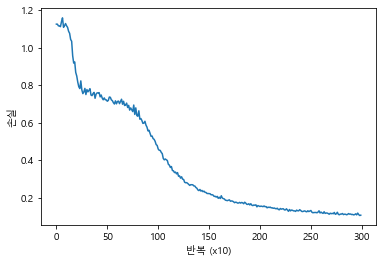

In [28]:
plt.rc('font', family='Malgun Gothic')
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

xx : 
[[-1.0223507 -1.0213507 -1.0203507 ...  1.0866493  1.0876493  1.0886493]
 [-1.0223507 -1.0213507 -1.0203507 ...  1.0866493  1.0876493  1.0886493]
 [-1.0223507 -1.0213507 -1.0203507 ...  1.0866493  1.0876493  1.0886493]
 ...
 [-1.0223507 -1.0213507 -1.0203507 ...  1.0866493  1.0876493  1.0886493]
 [-1.0223507 -1.0213507 -1.0203507 ...  1.0866493  1.0876493  1.0886493]
 [-1.0223507 -1.0213507 -1.0203507 ...  1.0866493  1.0876493  1.0886493]]
--------------------------------------------------------------------------------
yy : 
[[-0.98867266 -0.98867266 -0.98867266 ... -0.98867266 -0.98867266
  -0.98867266]
 [-0.98767266 -0.98767266 -0.98767266 ... -0.98767266 -0.98767266
  -0.98767266]
 [-0.98667266 -0.98667266 -0.98667266 ... -0.98667266 -0.98667266
  -0.98667266]
 ...
 [ 1.05532734  1.05532734  1.05532734 ...  1.05532734  1.05532734
   1.05532734]
 [ 1.05632734  1.05632734  1.05632734 ...  1.05632734  1.05632734
   1.05632734]
 [ 1.05732734  1.05732734  1.05732734 ...  1.05732734

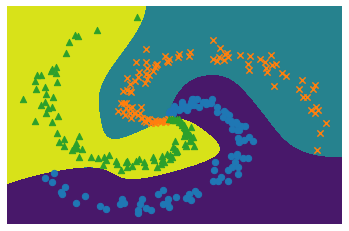

In [29]:
# 경계 영역 플롯 : Decision Boundary(결정 경계)
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print('xx : ')
print(xx)
print('-'*80)
print('yy : ')
print(yy)
print('-'*80)
X = np.c_[xx.ravel(), yy.ravel()]
print('X : ')
print(X)

score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)  # 예측 값
plt.contourf(xx, yy, Z)
plt.axis('off')  # x,y 축 표시 없앰

# 데이터점 플롯
x, t = load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

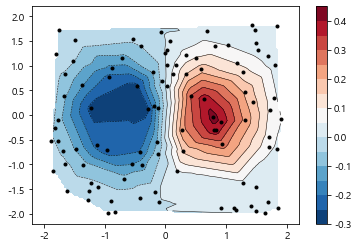

In [30]:
import matplotlib.tri as tri

npts = 100
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)
ngridx = 100
ngridy = 100
xi = np.linspace(-2.2, 2.2, ngridx)
yi = np.linspace(-2.2, 2.2, ngridy)
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)


plt.contour(xi, yi, zi, levels=15, linewidths=0.5, colors='k')
cntr = plt.contourf(xi, yi, zi, levels=15, cmap="RdBu_r")
plt.colorbar(cntr)
plt.plot(x, y, 'ko', ms=3)
plt.show()